In [412]:
#import thu vien
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [413]:
df = pd.read_csv('/Users/binh230901/Desktop/DA/project/miai/phan_tich_du_lieu_giao_dich_nh/S2_DataFile(2).csv')
df.head()

,BRANCH_ID,CHANNEL_ID,AMOUNT,TRAN_TYPE,TRAN_TIME
0,BR0001,MOBILE,3020080,BOOKING ORDER,12/01/2019 1:11
1,BR0002,ATM,2001100,CASH TRANSACTIONS,12/01/2019 11:01
2,BR0004,MOBILE,2140140,BOOKING ORDER,12/01/2019 1:11
3,BR0002,INTERNET,4293000,FINANCIAL POSTING,12/01/2019 6:50
4,BR0003,MOBILE,3046430,BOOKING ORDER,12/01/2019 1:11


# prepare data

In [414]:
# chuyển cột tran_time về định dạng datetime
df['TRAN_TIME'] = pd.to_datetime(df['TRAN_TIME'],format='%d/%m/%Y %H:%M')
df.head()

,BRANCH_ID,CHANNEL_ID,AMOUNT,TRAN_TYPE,TRAN_TIME
0,BR0001,MOBILE,3020080,BOOKING ORDER,2019-01-12 01:11:00
1,BR0002,ATM,2001100,CASH TRANSACTIONS,2019-01-12 11:01:00
2,BR0004,MOBILE,2140140,BOOKING ORDER,2019-01-12 01:11:00
3,BR0002,INTERNET,4293000,FINANCIAL POSTING,2019-01-12 06:50:00
4,BR0003,MOBILE,3046430,BOOKING ORDER,2019-01-12 01:11:00


In [415]:
# loại bỏ dữ liệu amount bé hơn 0
df = df.loc[df['AMOUNT'] >0]
df.loc[df['AMOUNT'] < 0]

,BRANCH_ID,CHANNEL_ID,AMOUNT,TRAN_TYPE,TRAN_TIME


# phân tích dữ liệu 
## biểu đồ pie về tỷ lệ số tiền giao dịch theo từng kênh

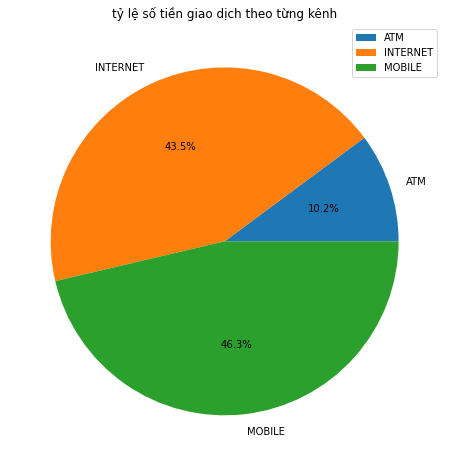

In [416]:
# groupby channel_id theo amount
sum_channel_id = df.groupby('CHANNEL_ID')['AMOUNT'].sum().reset_index()
sum_channel_id['AMOUNT']

# ve bieu do
# plt.pie(sum_channel_id['AMOUNT'],autopct='%.1f%%', labels= sum_channel_id['CHANNEL_ID']);


# fig = plt.gcf()
# fig.set_size_inches(8,8);
sum_channel_id.plot.pie(y= 'AMOUNT',labels = sum_channel_id['CHANNEL_ID'], figsize= (8,8), autopct='%.1f%%')
plt.title('tỷ lệ số tiền giao dịch theo từng kênh')
plt.ylabel('');


In [417]:
# nhận xét
'''
qua đây chúng ta thấy lượng tiền giao dịch đa số thực hiện qua mobile và internet còn ATM chỉ chiếm một phần khá 
nhỏ. Từ đó chúng ta thấy được lượng tiền được quy đổi ra tiền mặt để dùng đang chiếm khá ít đa số là được giao
dịch qua công nghệ
'''

'\nqua đây chúng ta thấy lượng tiền giao dịch đa số thực hiện qua mobile và internet còn ATM chỉ chiếm một phần khá \nnhỏ. Từ đó chúng ta thấy được lượng tiền được quy đổi ra tiền mặt để dùng đang chiếm khá ít đa số là được giao\ndịch qua công nghệ\n'

## biểu đồ cột về số lượng và doanh số của từng kênh 

In [418]:
# tính số lượng của từng channel rồi chuyển thành %
count_channel_id = df.groupby('CHANNEL_ID')['AMOUNT'].count().reset_index(name= 'count')
count_channel_id['count_perct'] = count_channel_id['count']/sum(count_channel_id['count'])*100
count_channel_id

,CHANNEL_ID,count,count_perct
0,ATM,98,19.678715
1,INTERNET,72,14.457831
2,MOBILE,328,65.863454


In [419]:
# tính doanh số của từng kênh rồi chuyển thành %
amount_channel_id = df.groupby('CHANNEL_ID')['AMOUNT'].sum().reset_index(name= 'sum_amount')
amount_channel_id['amount_perct'] = amount_channel_id['sum_amount']/ sum(amount_channel_id['sum_amount'])*100
amount_channel_id

,CHANNEL_ID,sum_amount,amount_perct
0,ATM,179502250,10.160906
1,INTERNET,768629241,43.509035
2,MOBILE,818465352,46.330059


In [420]:
# merge(join) hai bảng lại với nhau
plot_2 = count_channel_id.merge(amount_channel_id, on= 'CHANNEL_ID' )
plot_2

,CHANNEL_ID,count,count_perct,sum_amount,amount_perct
0,ATM,98,19.678715,179502250,10.160906
1,INTERNET,72,14.457831,768629241,43.509035
2,MOBILE,328,65.863454,818465352,46.330059


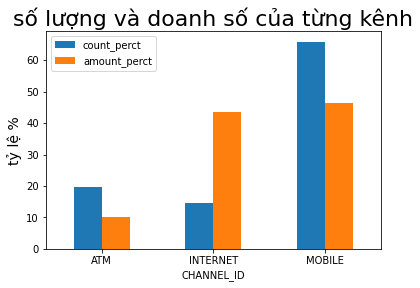

In [421]:
# vẽ biểu đồ
plot_2.plot.bar(x= 'CHANNEL_ID' ,y= ['count_perct', 'amount_perct']);
plt.title('số lượng và doanh số của từng kênh', fontsize= 22)
plt.ylabel('tỷ lệ %', fontsize = 14)
plt.xticks(rotation = 0);

In [422]:
# nhận xét
'''
- lượng khách hàng sử dụng dịch vụ qua mobile chiếm nhiều nhất với hơn một nửa và dễ hiểu lượng tiền giao dịch qua 
hình thức này cũng cao tương ứng
- nhưng với điểm lưu ý thứ 2 là internet mặc dụ lượng khách hàng sử dụng trao đổi qua internet là ít nhưng lượng
tiền giao dịch qua kênh này là rất lớn cho thấy được các món lớn thì khách hàng thường sử dụng internet
- còn ATM thì chiếm tỷ trọng về số lượng giao dịch và volumn tiền mặt khá thấp điều này cũng dễ hiểu khi người
ta dẫn chuyển sang các hình thức thanh toán mà không cần dùng đến tiền mặt quá nhiều

'''

'\n- lượng khách hàng sử dụng dịch vụ qua mobile chiếm nhiều nhất với hơn một nửa và dễ hiểu lượng tiền giao dịch qua \nhình thức này cũng cao tương ứng\n- nhưng với điểm lưu ý thứ 2 là internet mặc dụ lượng khách hàng sử dụng trao đổi qua internet là ít nhưng lượng\ntiền giao dịch qua kênh này là rất lớn cho thấy được các món lớn thì khách hàng thường sử dụng internet\n- còn ATM thì chiếm tỷ trọng về số lượng giao dịch và volumn tiền mặt khá thấp điều này cũng dễ hiểu khi người\nta dẫn chuyển sang các hình thức thanh toán mà không cần dùng đến tiền mặt quá nhiều\n\n'

## biểu đồ lưu lượng giao dịch của từng kênh theo từng giờ 


In [423]:
# tách giờ ra từ tran_time
df['TRAN_HOUR'] = df['TRAN_TIME'].dt.strftime('%H')
df

,BRANCH_ID,CHANNEL_ID,AMOUNT,TRAN_TYPE,TRAN_TIME,TRAN_HOUR
0,BR0001,MOBILE,3020080,BOOKING ORDER,2019-01-12 01:11:00,01
1,BR0002,ATM,2001100,CASH TRANSACTIONS,2019-01-12 11:01:00,11
2,BR0004,MOBILE,2140140,BOOKING ORDER,2019-01-12 01:11:00,01
3,BR0002,INTERNET,4293000,FINANCIAL POSTING,2019-01-12 06:50:00,06
4,BR0003,MOBILE,3046430,BOOKING ORDER,2019-01-12 01:11:00,01
...,...,...,...,...,...,...
495,BR0050,ATM,200000,CASH TRANSACTIONS,2019-01-12 08:45:00,08
496,BR0002,MOBILE,100000,FINANCIAL POSTING,2019-04-11 21:13:00,21
497,BR0002,MOBILE,6259900,FINANCIAL POSTING,2019-01-12 10:53:00,10
498,BR0002,INTERNET,10000,FINANCIAL POSTING,2019-01-12 08:58:00,08


In [424]:
# tính số ngày giao dịch
number_of_day = (df['TRAN_TIME'].max().date() - df['TRAN_TIME'].min().date()).days
number_of_day

89

In [425]:
# tính số lượng giao dịch theo từng khung giờ 
count_by_CNNTime = df.groupby(['CHANNEL_ID','TRAN_HOUR']).size().reset_index(name='count_cnn_time')
count_by_CNNTime


,CHANNEL_ID,TRAN_HOUR,count_cnn_time
0,ATM,06,17
1,ATM,07,9
2,ATM,08,19
3,ATM,09,6
4,ATM,10,19
5,ATM,11,10
6,ATM,12,2
7,ATM,13,6
8,ATM,14,3
9,ATM,21,7


In [436]:
# pivot table
plot_3 = pd.pivot_table(count_by_CNNTime,values='count_cnn_time',index= 'TRAN_HOUR', columns= 'CHANNEL_ID')
plot_3

CHANNEL_ID,ATM,INTERNET,MOBILE
TRAN_HOUR,,,
00,NaN,1.0,1.0
01,NaN,3.0,194.0
02,NaN,NaN,1.0
04,NaN,NaN,1.0
06,17.0,3.0,4.0
07,9.0,3.0,4.0
08,19.0,7.0,19.0
09,6.0,9.0,18.0
10,19.0,6.0,18.0


In [444]:
# chia ra theo từng ngày
plot_3 = plot_3.loc[:,'ATM':'MOBILE'] / number_of_day
# điền giá trị NaN thành 0
plot_3 = plot_3.fillna(0)
plot_3

CHANNEL_ID,ATM,INTERNET,MOBILE
TRAN_HOUR,,,
00,0.000000,0.011236,0.011236
01,0.000000,0.033708,2.179775
02,0.000000,0.000000,0.011236
04,0.000000,0.000000,0.011236
06,0.191011,0.033708,0.044944
07,0.101124,0.033708,0.044944
08,0.213483,0.078652,0.213483
09,0.067416,0.101124,0.202247
10,0.213483,0.067416,0.202247


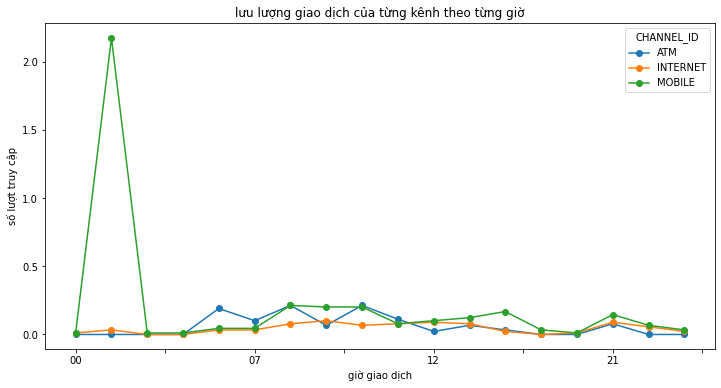

In [459]:
#
plot_3.plot(y=['ATM','INTERNET','MOBILE' ], figsize = (12,6), marker= 'o')
plt.xlabel('giờ giao dịch')
plt.ylabel('số lượt truy cập')
plt.title('lưu lượng giao dịch của từng kênh theo từng giờ');

In [428]:
df_plot3

CHANNEL_ID,ATM,INTERNET,MOBILE
TRAN_HOUR,,,
00,0.000000,0.011236,0.011236
01,0.000000,0.033708,2.179775
02,0.000000,0.000000,0.011236
04,0.000000,0.000000,0.011236
06,0.191011,0.033708,0.044944
07,0.101124,0.033708,0.044944
08,0.213483,0.078652,0.213483
09,0.067416,0.101124,0.202247
10,0.213483,0.067416,0.202247


In [429]:
df

,BRANCH_ID,CHANNEL_ID,AMOUNT,TRAN_TYPE,TRAN_TIME,TRAN_HOUR
0,BR0001,MOBILE,3020080,BOOKING ORDER,2019-01-12 01:11:00,01
1,BR0002,ATM,2001100,CASH TRANSACTIONS,2019-01-12 11:01:00,11
2,BR0004,MOBILE,2140140,BOOKING ORDER,2019-01-12 01:11:00,01
3,BR0002,INTERNET,4293000,FINANCIAL POSTING,2019-01-12 06:50:00,06
4,BR0003,MOBILE,3046430,BOOKING ORDER,2019-01-12 01:11:00,01
...,...,...,...,...,...,...
495,BR0050,ATM,200000,CASH TRANSACTIONS,2019-01-12 08:45:00,08
496,BR0002,MOBILE,100000,FINANCIAL POSTING,2019-04-11 21:13:00,21
497,BR0002,MOBILE,6259900,FINANCIAL POSTING,2019-01-12 10:53:00,10
498,BR0002,INTERNET,10000,FINANCIAL POSTING,2019-01-12 08:58:00,08
